<a href="https://colab.research.google.com/github/taha-amr/hello-world/blob/master/Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Taha Abdelsalam Amr

ID: 46-2525

Tutorial: T-01

---

Name: Abdelrahman Hussein

ID: 46-0297

Tutorial: T-01

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company and its MMR is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period to.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
# describing the 2 numerical columns
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
# describing all columns including type object
df.describe(include=[object])

,make,model,trim,body,transmission,vin,state,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578
unique,48,648,1097,71,2,46578,34,39460,20,17,4686,1021,953,2286
top,Ford,Altima,Base,Sedan,automatic,5npec4ac4ch440033,fl,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,7871,1610,4851,17171,44928,1,7451,86,9156,20734,1733,168,397,490


In [ ]:
# know the shape of data (rows, columns)
df.shape

(46578, 16)

In [ ]:
# displaying dtypes of columns using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
# counting total number of null values in each column
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
# determining unique values in column transmission
print(f"{df.transmission} : {df['transmission'].unique()}")

0        automatic
1        automatic
2        automatic
3        automatic
4        automatic
           ...    
46573    automatic
46574    automatic
46575    automatic
46576    automatic
46577    automatic
Name: transmission, Length: 46578, dtype: object : ['automatic' 'manual']


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
# changing mmr and selling price to int64
df.mmr = df.mmr.str[1:]
df.mmr = df.mmr.astype(int)

df.sellingprice = df.sellingprice.str[1:]
df.sellingprice = df.sellingprice.astype(int)
df[['mmr', 'sellingprice']].dtypes

mmr             int64
sellingprice    int64
dtype: object

In [ ]:
# changing odometer to float
df.odometer = df.odometer.str[:-2]
df.odometer = df.odometer.astype(float)

In [ ]:
# changing saledate column to datetime
df['saledate'] = pd.to_datetime(df['saledate'],utc=True)
df.saledate.dtype

datetime64[ns, UTC]

In [ ]:
# observing number of unique values in each column not exceeding 100 in total
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 100:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

make : ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
body : ['sedan' 'SUV' 'Sedan' 'E-Series Van' 'Crew Cab' 'suv' 'G Sedan' 'Wagon'
 'Regular Cab' 'Double Cab' 'wagon' 'Coupe' 'Minivan' 'SuperCrew' 'coupe'
 'convertible' 'Extended Cab' 'Hatchback' 'van' 'hatchback' 'Van'
 'Convertible' 'SuperCab' 'g sedan' 'king cab' 'G Convertible' 'King Cab'
 'extended cab' 'quad cab' 'supercab' 'Beetle Convertible' 'minivan'
 'G Coupe' 'Quad Cab' 'crew cab' 'supercrew' 'CrewMax Cab' 'double cab'
 'g coupe' 'Club Cab' 'Access Cab' 'Genesis Coupe' 'e-series van'
 'G37 Convertible' 'Cab Plus 4' 'crewmax

In [ ]:
# changing dashed enteries to be more representable to unknown
df.loc[df["color"]=="—","color"]=df.color.mode()
df.loc[df["interior"]=="—","interior"]=df.interior.mode()

In [ ]:
# re-observing number of unique values in each column not exceeding 100 in total to see changes
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 100:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

make : ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
body : ['sedan' 'SUV' 'Sedan' 'E-Series Van' 'Crew Cab' 'suv' 'G Sedan' 'Wagon'
 'Regular Cab' 'Double Cab' 'wagon' 'Coupe' 'Minivan' 'SuperCrew' 'coupe'
 'convertible' 'Extended Cab' 'Hatchback' 'van' 'hatchback' 'Van'
 'Convertible' 'SuperCab' 'g sedan' 'king cab' 'G Convertible' 'King Cab'
 'extended cab' 'quad cab' 'supercab' 'Beetle Convertible' 'minivan'
 'G Coupe' 'Quad Cab' 'crew cab' 'supercrew' 'CrewMax Cab' 'double cab'
 'g coupe' 'Club Cab' 'Access Cab' 'Genesis Coupe' 'e-series van'
 'G37 Convertible' 'Cab Plus 4' 'crewmax

In [ ]:
# preparing body column for cleaning by first making all enteries to lower case
df['body'] = df['body'].str.lower()
df[df['body']=='koup']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
3495,2012,Kia,Forte,Koup SX,koup,automatic,knafw6a38c5532315,nj,2.7,41580.0,red,black,kia motors finance,10750,11400,2015-05-26 19:30:00+00:00
3572,2010,Kia,Forte,Koup EX,koup,automatic,knafu6a26a5118010,in,3.5,63678.0,blue,black,santander consumer,6950,7200,2015-01-21 18:10:00+00:00
10355,2012,Kia,Forte,Koup SX,koup,automatic,knafw6a35c5517643,fl,2.9,24561.0,black,black,kia motors finance,12350,11100,2015-03-02 17:30:00+00:00
16550,2012,Kia,Forte,Koup SX,koup,automatic,knafw6a32c5620308,pr,4.1,31365.0,gray,black,oriental bank,11250,12900,2015-01-14 19:30:00+00:00
16642,2010,Kia,Forte,Koup EX,koup,automatic,knafu6a24a5110830,ga,2.4,77533.0,silver,NaN,"jpmorgan chase bank,n.a.",6450,6100,2015-01-21 18:00:00+00:00
22209,2013,Kia,Forte,Koup EX,koup,automatic,knafu6a20d5701578,tx,2.1,29454.0,white,gray,wells fargo dealer services,11100,9700,2015-01-20 18:00:00+00:00
22764,2012,Kia,Forte,Koup EX,koup,automatic,knafu6a20c5556475,nj,2.4,24084.0,silver,black,kia motors finance,10800,9100,2015-05-26 19:30:00+00:00
29283,2011,Kia,Forte,Koup SX,koup,automatic,knafw6a37b5366660,oh,4.3,81401.0,blue,black,pauley motor car co preowned vehicles llc,7250,9700,2015-02-02 17:30:00+00:00
41213,2012,Kia,Forte,Koup EX,koup,automatic,knafu6a2xc5560503,ga,3.4,109365.0,silver,black,tdaf remarketing,8625,7000,2015-02-18 18:00:00+00:00
41653,2012,Kia,Forte,Koup EX,koup,automatic,knafu6a21c5582406,oh,2.7,39540.0,white,black,hyundai motor finance,10000,9500,2015-06-01 19:30:00+00:00


In [ ]:
# data inspection
df.loc[df['body'].str.contains('van')]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
4,2014,Ford,E-Series Van,E-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00
20,2008,Honda,Odyssey,Touring,minivan,automatic,5fnrl38938b007721,nc,3.5,137852.0,white,beige,rick hendrick chevrolet buick gmc,8500,8900,2015-02-15 17:30:00+00:00
24,2012,Toyota,Sienna,LE 8-Passenger,minivan,automatic,5tdka3dc9cs013147,fl,4.1,25446.0,blue,gray,world omni financial corporation,17850,17800,2015-01-26 17:30:00+00:00
38,2014,Chrysler,Town and Country,Touring,minivan,automatic,2c4rc1bg4er269758,fl,4.0,29336.0,silver,black,pv holding inc/gdp,18550,18900,2015-03-01 20:30:00+00:00
72,2014,GMC,Savana Cargo,2500,van,automatic,1gtw7fca8e1909666,or,4.7,9370.0,white,gray,u-haul,19800,19300,2015-06-08 22:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46463,2005,Chrysler,Town and Country,Touring,minivan,automatic,2c4gp54l55r157080,wi,2.3,85894.0,gray,gray,arlington hgts chry dod jeep,3625,2850,2015-01-13 18:00:00+00:00
46480,2012,Toyota,Sienna,LE 8-Passenger,minivan,automatic,5tdkk3dc4cs194736,fl,2.9,44691.0,gray,gray,world omni financial corporation,17000,15400,2015-02-23 17:30:00+00:00
46491,2012,Honda,Odyssey,EX,minivan,automatic,5fnrl5h42cb026897,pa,3.2,47617.0,gold,gray,"ahfc/honda lease trust/hvt, inc. eot",18250,17000,2015-01-29 17:00:00+00:00
46512,2001,Pontiac,Montana,Base,minivan,automatic,1gmdx03e01d202007,fl,3.3,92672.0,gold,tan,autonation lincoln clearwater,1275,2000,2015-01-20 02:00:00+00:00


In [ ]:
# Reduce the ’body’ categories into a few main types: 'Sedan','Coupe', 'Convertible', 'Hatchback', 'SUV', 'Mini- van', 'Wagon' and 'Pickup Truck'
bt=['Sedan','Coupe', 'Convertible', 'Hatchback', 'SUV', 'Mini- van', 'Wagon', 'Pickup Truck']
for t in bt:
  if(t=='Mini- van'):
    df.loc[df['body'].str.contains('van'),'body']=t
  elif (t=='Pickup Truck'):
    df.loc[df['body'].str.contains('cab'),'body']=t
    df.loc[df['body'].str.contains('supercrew'),'body']=t
  elif (t=='Coupe'):
    df.loc[df['body'].str.contains('oup'),'body']=t
  else:
    df.loc[df['body'].str.contains(t.lower()),'body']=t

In [ ]:
# changing type of column to categorical
df['body'] = df['body'].astype('category')

In [ ]:
# data inspection of unique values
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 100:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

make : ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
transmission : ['automatic' 'manual']
state : ['ma' 'fl' 'wa' 'co' 'ca' 'il' 'nv' 'mo' 'tx' 'ne' 'md' 'nj' 'la' 'ny'
 'nc' 'ut' 'va' 'ga' 'tn' 'oh' 'ms' 'pa' 'or' 'mi' 'wi' 'az' 'pr' 'mn'
 'in' 'hi' 'sc' 'ok' 'nm' 'al']
color : ['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' nan 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']
interior : ['gray' nan 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'y

In [ ]:
# outlier/noise detection in selling price column
df.sort_values('sellingprice', ascending = False)
df.head()
df.sellingprice.max()

230000

In [ ]:
# outlier detection in selling price column, the entry number 18134 seems to be wrong
# selling price seems to be abnormal/extreme
df = df.sort_values('sellingprice', ascending = False)
df.head()



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
18134,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,22800,230000,2015-02-24 18:00:00+00:00
35140,2014,Porsche,911,Turbo,Coupe,automatic,wp0ad2a91es166878,fl,4.9,5993.0,white,black,flag/capital eurocars inc,146000,152000,2015-06-16 20:05:00+00:00
31657,2014,BMW,i8,Base,Coupe,automatic,wby2z2c56evx64302,ca,4.2,2668.0,white,brown,"carbiz solutions, inc.",145000,143000,2015-06-17 22:00:00+00:00
25541,2013,Bentley,Continental GT,V8,Coupe,automatic,scbft7za3dc083274,ca,4.0,15859.0,blue,beige,porsche fin svcs dba bentley financial services,129000,131500,2015-02-11 20:30:00+00:00
3484,2012,Audi,R8,5.2 quattro,Coupe,automatic,wuaenafg0cn001127,ca,4.5,3885.0,NaN,black,volkswagen credit inc/sc,117000,120000,2015-01-14 20:30:00+00:00


In [ ]:
# calculating mean of similar data of the error (same model, year and condition), for accurate representation
sum_esc=df[(df['model'] == 'Escape') & (df['year']== 2014) & (df['condition']==4.3)]['sellingprice'].sum()-df['sellingprice'].max()
count_esc=df[(df['model'] == 'Escape') & (df['year']== 2014) & (df['condition']==4.3)]['sellingprice'].count()-1
mean_esc=sum_esc//count_esc

In [ ]:
# replacing abnormal entring with calculated mean
df.iloc[0,14] = mean_esc

In [ ]:
# inspecting possible abnormalities in odometer column, however, it seems possible/logical
df = df.sort_values('odometer', ascending = False)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
19061,2010,Chevrolet,Cobalt,LT,Sedan,automatic,1g1af5f55a7180158,ny,1.0,999999.0,silver,black,santander consumer,2850,275,2014-12-31 01:00:00+00:00
686,2003,Ford,Expedition,XLT Value,SUV,automatic,1fmru15w03lc00745,ca,2.0,999999.0,white,gray,800 loan mart,700,900,2015-02-02 21:00:00+00:00
40912,2006,Mazda,Tribute,i,SUV,automatic,4f2yz02z26km30632,fl,2.0,999999.0,white,tan,santander consumer,1800,1200,2015-02-08 17:30:00+00:00
13150,2014,Kia,Forte,EX,Sedan,automatic,knafx4a8xe5052180,tx,1.0,999999.0,black,black,kia motors finance,11300,3100,2015-03-02 18:30:00+00:00
241,1998,Lexus,ES 300,Base,Sedan,automatic,jt8bf28g4w5037146,ca,2.0,999999.0,gray,beige,800 loan mart,650,350,2015-02-16 21:00:00+00:00


In [ ]:
# transmission to cat; changing type of transmission column to categorical (int), where 0 represents automatic cars, and 1 represents manual transmission
# is the transmission manual?
# 
df['transmission'] = df['transmission'].astype('category').cat.codes

print(df['transmission'].value_counts())
print(df['transmission'].value_counts() / df['transmission'].count())
df.transmission.head(10)


0    44928
1     1650
Name: transmission, dtype: int64
0    0.964576
1    0.035424
Name: transmission, dtype: float64


19061    0
686      0
40912    0
13150    0
241      0
577      0
43568    0
45016    0
24532    0
17613    0
Name: transmission, dtype: int8

In [ ]:
# object inspection of unique values
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 100:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

make : ['Chevrolet' 'Ford' 'Mazda' 'Kia' 'Lexus' 'Dodge' 'Mercury' 'Honda'
 'Toyota' 'Chrysler' 'GMC' 'Jeep' 'Mercedes-Benz' 'Hyundai' 'Nissan'
 'Mitsubishi' 'Acura' 'Volvo' 'Buick' 'Pontiac' 'Isuzu' 'Saturn'
 'Volkswagen' 'Infiniti' 'BMW' 'Geo' 'Subaru' 'Cadillac' 'Lincoln' 'Saab'
 'HUMMER' 'Scion' 'Audi' 'Porsche' 'Oldsmobile' 'Suzuki' 'MINI' 'Ram'
 'Jaguar' 'Land Rover' 'Plymouth' 'smart' 'Bentley' 'FIAT' 'Fisker'
 'Maserati' 'Aston Martin' 'Ferrari']
state : ['ny' 'ca' 'fl' 'tx' 'mi' 'ga' 'va' 'wi' 'il' 'oh' 'nc' 'ma' 'mo' 'nj'
 'md' 'tn' 'ms' 'co' 'mn' 'pa' 'la' 'nv' 'in' 'ok' 'sc' 'wa' 'az' 'ne'
 'pr' 'ut' 'or' 'hi' 'nm' 'al']
color : ['silver' 'white' 'black' 'gray' 'orange' 'beige' nan 'yellow' 'green'
 'blue' 'gold' 'red' 'purple' 'burgundy' 'brown' 'off-white' 'pink'
 'charcoal' 'turquoise' 'lime']
interior : ['black' 'gray' 'tan' 'beige' 'blue' 'brown' nan 'burgundy' 'silver' 'red'
 'purple' 'gold' 'green' 'white' 'orange' 'off-white' 'yellow']


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

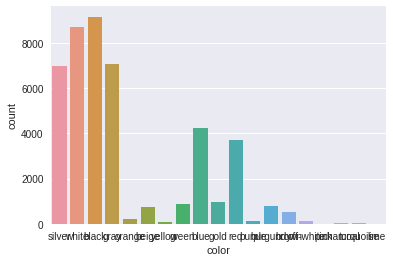

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

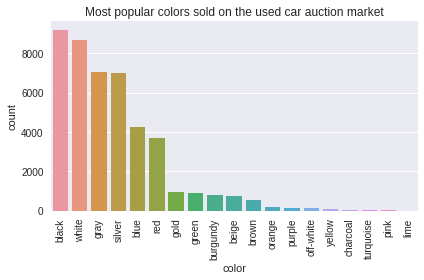

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

In [ ]:
# counting number of occurance of each car maker in dataset
top_makers = df.make.value_counts()
print(top_makers)

Ford             7871
Chevrolet        5322
Nissan           4297
Toyota           3474
Dodge            2718
Honda            2403
Hyundai          1801
BMW              1680
Kia              1639
Chrysler         1566
Infiniti         1442
Mercedes-Benz    1375
Jeep             1305
Volkswagen       1038
Lexus            1024
GMC               901
Mazda             701
Cadillac          606
Audi              485
Acura             476
Buick             467
Lincoln           457
Subaru            444
Ram               397
Pontiac           377
Mitsubishi        370
MINI              289
Saturn            286
Volvo             281
Scion             159
Mercury           148
Land Rover        143
Porsche           129
Jaguar            122
Suzuki             96
HUMMER             84
FIAT               56
Saab               41
smart              36
Oldsmobile         24
Isuzu              19
Maserati           10
Bentley             8
Plymouth            3
Fisker              3
Geo       

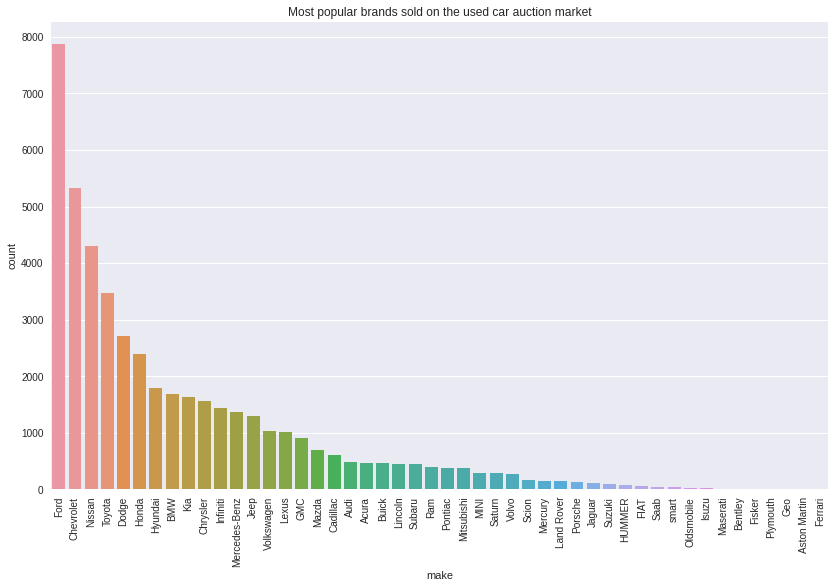

In [ ]:
# count plot sorted in descending order, rotated x-axis labels for clarity, and a plot title
large_to_small = df.groupby('make').size().sort_values(ascending=False)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='make', data=df, order=large_to_small.index).set(title='Most popular brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The most popular car brands are Ford in the first place, then Chevrolet second, then Nissan third.

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

               year  transmission  ...            mmr   sellingprice
count  44928.000000       44928.0  ...   44928.000000   44928.000000
mean    2010.268786           0.0  ...   13892.634326   13756.387197
std        3.791140           0.0  ...    9492.157830    9558.578010
min     1990.000000           0.0  ...      25.000000     150.000000
25%     2008.000000           0.0  ...    7525.000000    7300.000000
50%     2012.000000           0.0  ...   12400.000000   12300.000000
75%     2013.000000           0.0  ...   18300.000000   18200.000000
max     2015.000000           0.0  ...  146000.000000  152000.000000

[8 rows x 6 columns]
              year  transmission  ...           mmr  sellingprice
count  1650.000000        1650.0  ...   1650.000000   1650.000000
mean   2008.423030           1.0  ...  11576.318182  11181.775758
std       4.443345           0.0  ...   9733.052172   9828.602381
min    1990.000000           1.0  ...    175.000000    225.000000
25%    2006.000000         

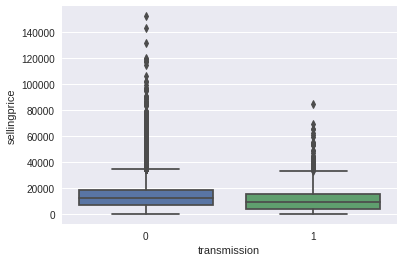

In [ ]:
# describing data of automatic transmission car and manual transmission cars, to inspect differences
# visualized in a boxplot
automatic = df[df['transmission'] == 0]
manual = df[df['transmission'] == 1]

print(automatic.describe())
print(manual.describe())
manual.describe()
sns.boxplot(x = 'transmission', y = 'sellingprice', data = df)
plt.show()

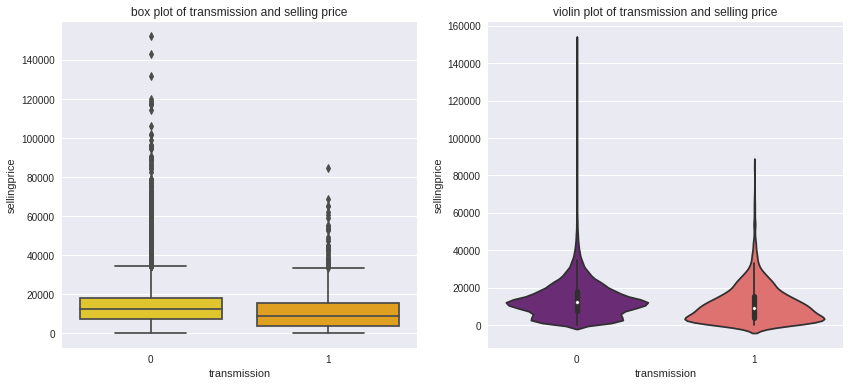

In [ ]:
#box plot and violin plot of transmission and selling price
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121) # 121 is equivalent to writing: nrows=1, ncols=2, index=1
sns.boxplot(x='transmission', y='sellingprice', data=df, palette='Wistia', ax=ax)
ax.set_title('box plot of transmission and selling price')

ax = f.add_subplot(122)
sns.violinplot(x='transmission', y='sellingprice', data=df, palette='magma', ax=ax)
ax.set_title('violin plot of transmission and selling price');

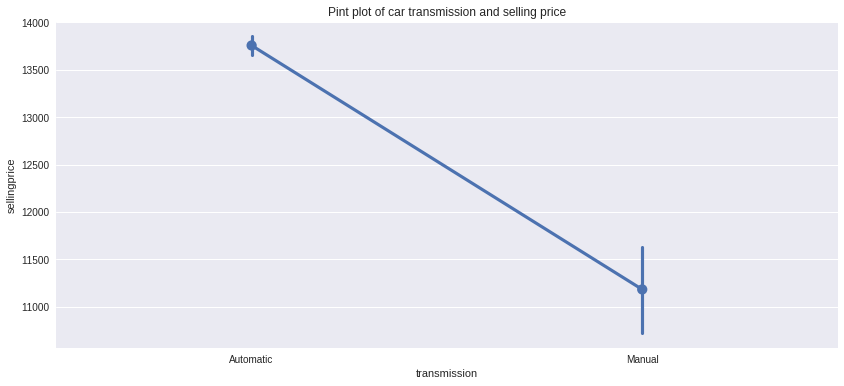

In [ ]:
# point plot for visualizing differences
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(111)
sns.pointplot(x = 'transmission', y = 'sellingprice', data = df, ax = ax).set(title='Pint plot of car transmission and selling price')
labels = ['Automatic', 'Manual']
ax.set_xticklabels(labels)
plt.show()

**Answer for Q2**: Using a point plot to represent the mean as the only point, automatic cars sell on average at a higher price than manual.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

In [ ]:
# defining IQR method to calculate IQR
def IQR(data, col):
  Q3 = np.quantile(data[col], 0.75)
  Q1 = np.quantile(data[col], 0.25)
  return Q3-Q1



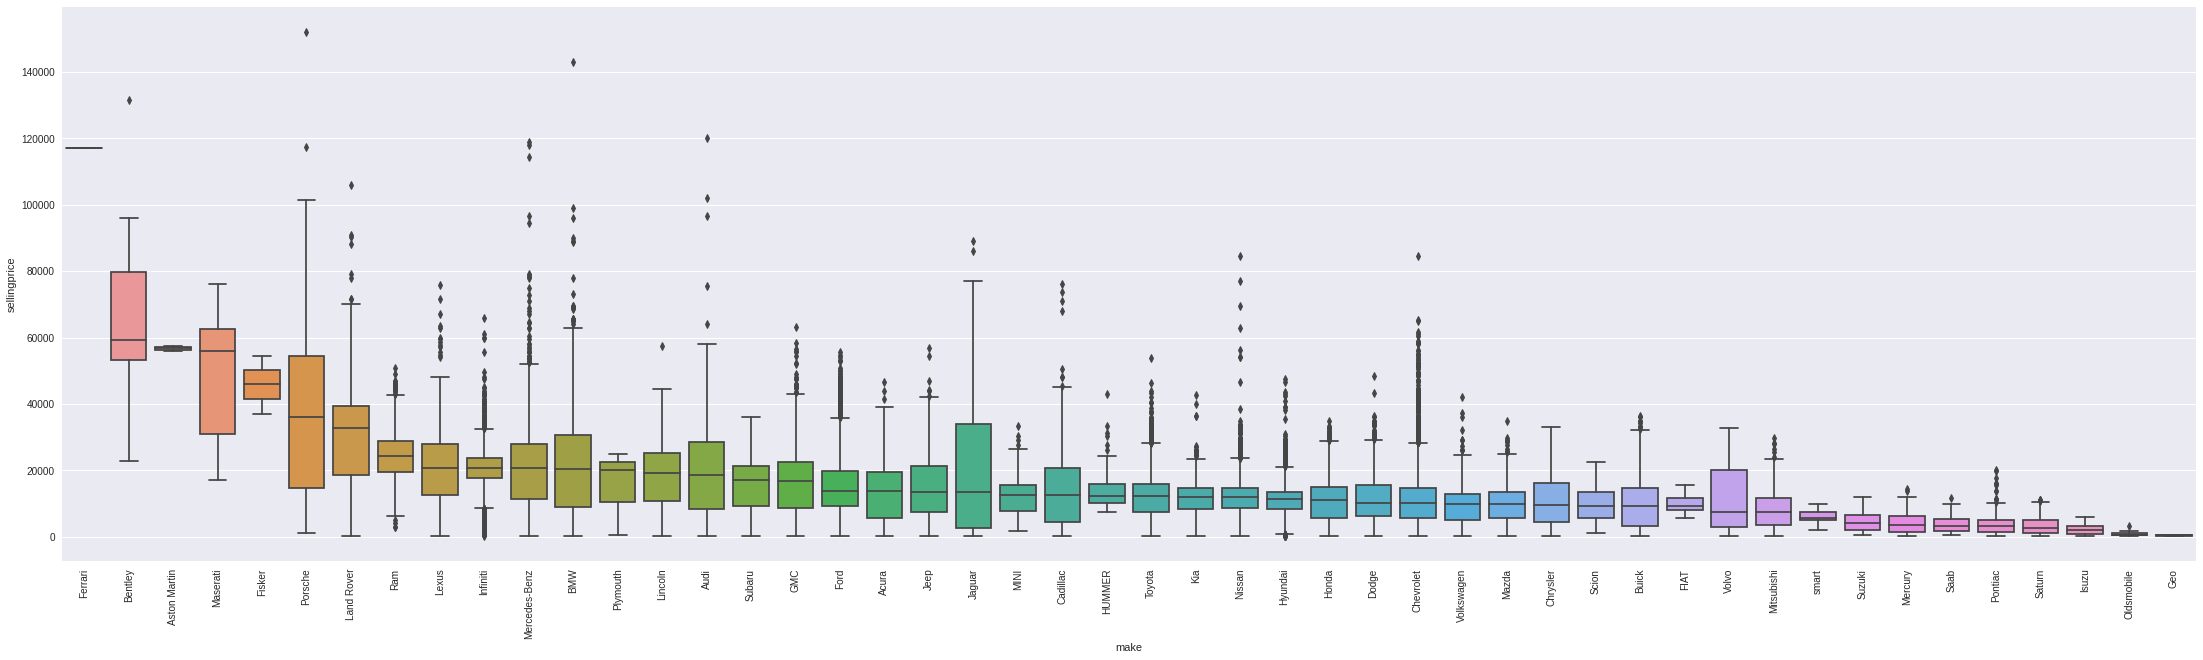

Index(['Ferrari', 'Bentley', 'Aston Martin', 'Maserati', 'Fisker', 'Porsche',
       'Land Rover', 'Ram', 'Lexus', 'Infiniti', 'Mercedes-Benz', 'BMW',
       'Plymouth', 'Lincoln', 'Audi', 'Subaru', 'GMC', 'Ford', 'Acura', 'Jeep',
       'Jaguar', 'MINI', 'Cadillac', 'HUMMER', 'Toyota', 'Kia', 'Nissan',
       'Hyundai', 'Honda', 'Dodge', 'Chevrolet', 'Volkswagen', 'Mazda',
       'Chrysler', 'Scion', 'Buick', 'FIAT', 'Volvo', 'Mitsubishi', 'smart',
       'Suzuki', 'Mercury', 'Saab', 'Pontiac', 'Saturn', 'Isuzu', 'Oldsmobile',
       'Geo'],
      dtype='object', name='make')

In [ ]:
# ploting boxplot of selling price and make sorted by median
ordered = df.groupby("make")["sellingprice"].median().iloc[::-1].sort_values(ascending=False).index
a4_dims = (30.7, 9.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x = 'make', y = 'sellingprice',data=df, order = ordered)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
ordered

In [ ]:
# calculating the IQR using the above implementeed method to determine distribution
# these 4 makers are selected after visualising the boxplot and selecting the longest bars
dfb=df[df["make"]=="Bentley"]
dfm=df[df["make"]=="Maserati"]
dfp=df[df["make"]=="Porsche"]
dfj=df[df["make"]=="Jaguar"]
print('bentley: ', IQR(dfb,"sellingprice"))
print('maserati: ', IQR(dfm,"sellingprice"))
print('porsche: ', IQR(dfp,"sellingprice"))
print('jaguar: ', IQR(dfj,"sellingprice"))

bentley:  26487.5
maserati:  31875.0
porsche:  39800.0
jaguar:  31325.0


**Answer for Q3**: using the interquartile range to determine the widest distribution of selling price, Porsche has the widest distribution and Maserati second. By sorting boxplot by median, Ferrari is the most expensive and Bentley second.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:
np.corrcoef(df["odometer"],df["sellingprice"])

array([[ 1.        , -0.58371354],
       [-0.58371354,  1.        ]])

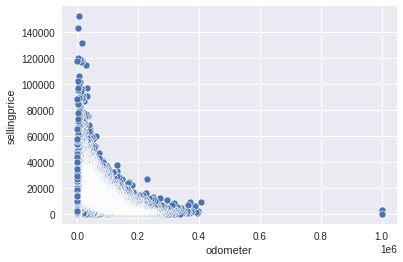

In [ ]:
sns.scatterplot(x = 'odometer', y = 'sellingprice', data = df)
plt.show()

# sns.lmplot(x='odometer', y='sellingprice', data=df, palette='viridis', height=8);
# plt.show()

[[ 1.         -0.58371354]
 [-0.58371354  1.        ]]


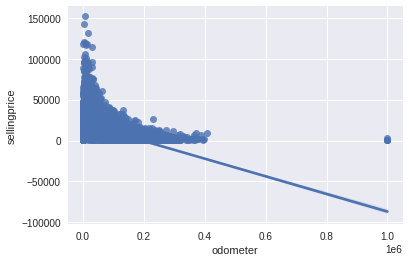

In [ ]:
# regression plot to display line of best fit
print(np.corrcoef(df["odometer"],df["sellingprice"]))
sns.regplot(x = 'odometer', y = 'sellingprice', data = df)
plt.show()

**Answer for Q4**: as indicated by the best fit line, odometer reading is negatively correlated with car's selling price

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:
# displaying correlation matrix of condition and selling price
np.corrcoef(df["condition"],df["sellingprice"])

array([[1.        , 0.53158978],
       [0.53158978, 1.        ]])

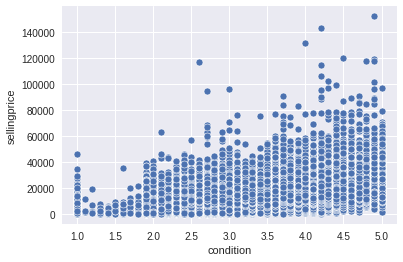

In [ ]:
# scatter plot to visualize correlation
sns.scatterplot(x = 'condition', y = 'sellingprice', data = df)
plt.show()

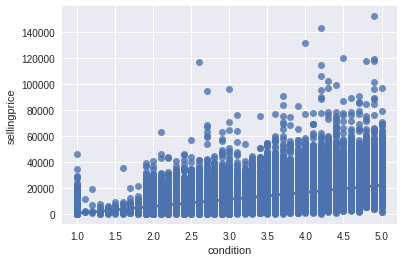

In [ ]:
# line of best on scatter plot
sns.regplot(x = 'condition', y = 'sellingprice', data = df)
plt.show()

**Answer for Q5**: line of best fit indicated  healthy positive correlation between the two variables

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

body
Pickup Truck    17981.766407
Convertible     17581.563278
Coupe           16538.921097
SUV             16204.294236
Mini- van       11981.053571
Sedan           11861.795912
Hatchback       10320.636123
Wagon            9872.678720
Name: sellingprice, dtype: float64


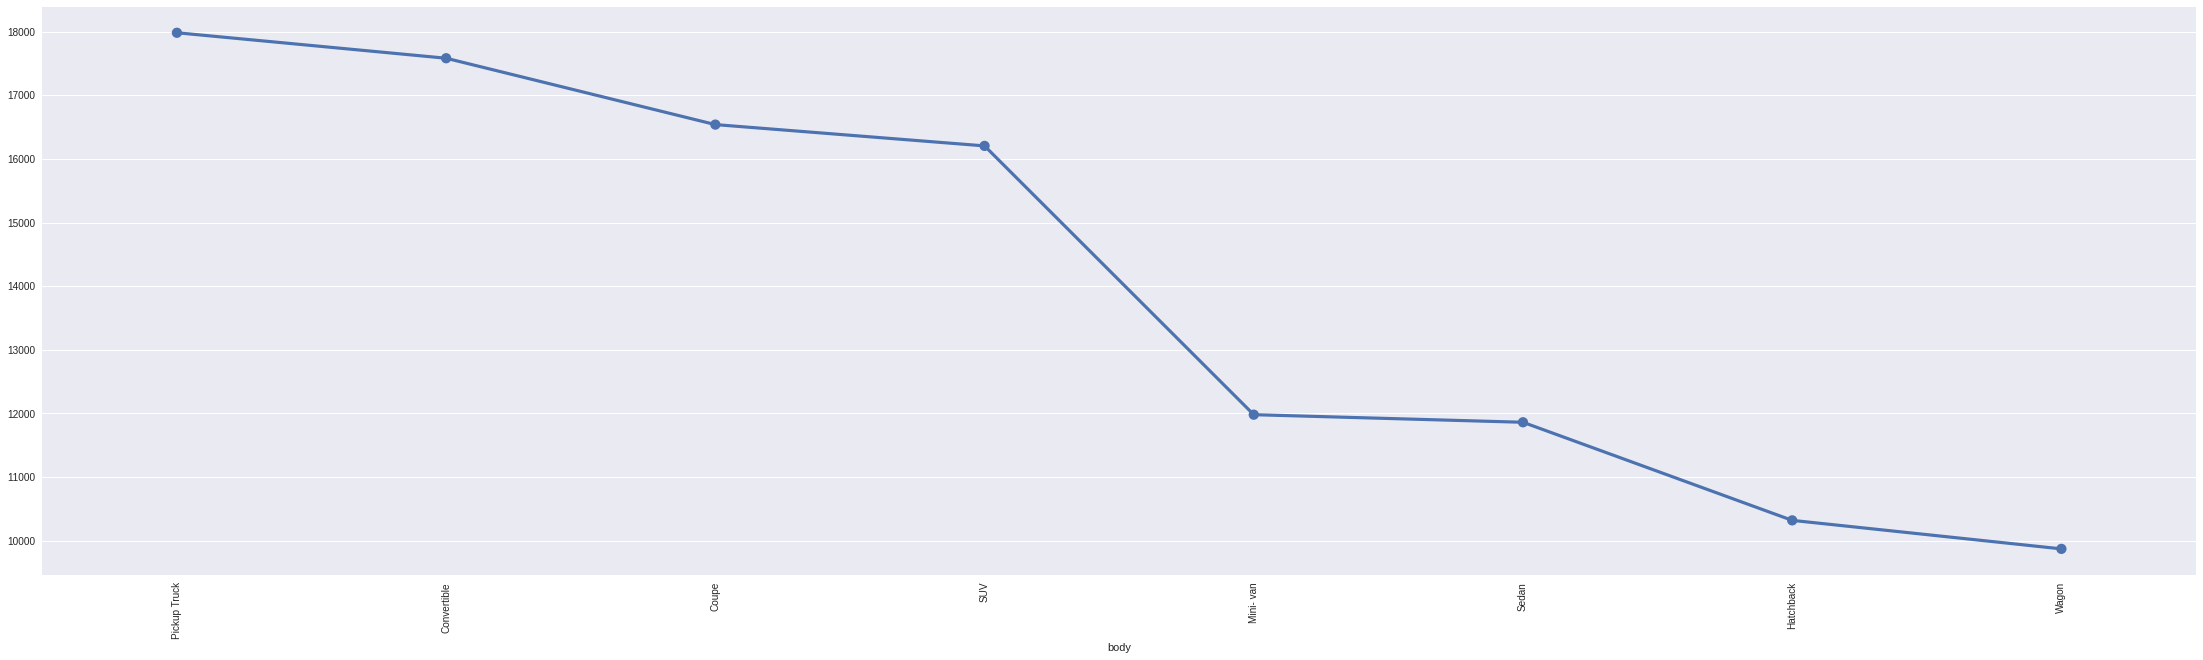

In [ ]:
# pointplot to viaualize differences in the average car price due to the car's body type
dff=df
dff=dff.groupby('body')['sellingprice'].mean().sort_values(ascending=False)
print(dff)
a4_dims = (30.7, 9.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.pointplot(ax=ax, x=dff.index,y=dff.values, order=dff.index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Answer for Q6**: yes there are differences in the average car price due to the car's body type.
Ranking: pick up, convertible, coupe, suv, mini van, sedan, hatchback, wagon.
Most expensive car body type is pick up truck.
Least expensive car body type is wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

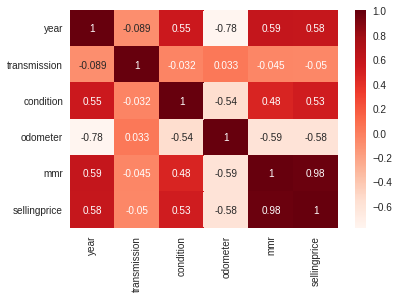

In [ ]:
# heatmap to visualize correlation between numerical attributes
sns.heatmap(df.corr(), annot=True, cmap='Reds');

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46578 entries, 19061 to 27067
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   year                46578 non-null  int64              
 1   model               46578 non-null  object             
 2   trim                46578 non-null  object             
 3   transmission        46578 non-null  int8               
 4   vin                 46578 non-null  object             
 5   condition           46578 non-null  float64            
 6   odometer            46578 non-null  float64            
 7   color               44332 non-null  object             
 8   interior            45590 non-null  object             
 9   seller              46578 non-null  object             
 10  mmr                 46578 non-null  int64              
 11  sellingprice        46578 non-null  int64              
 12  saledate            46578 n

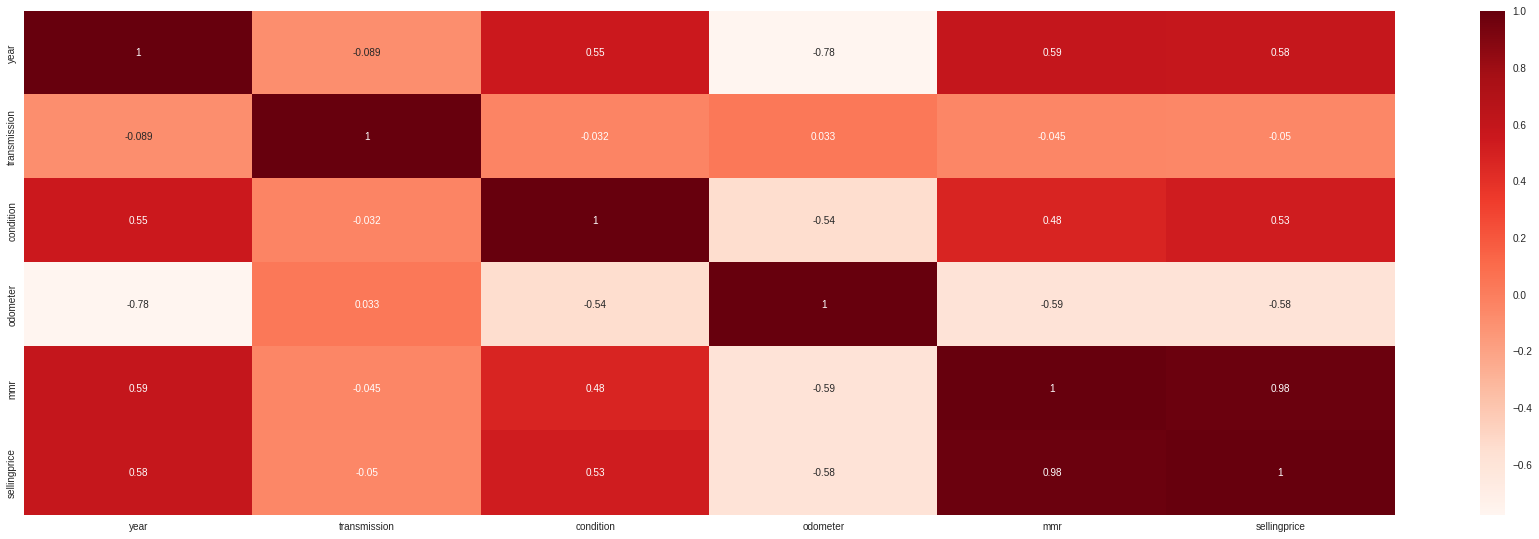

In [ ]:
# using label enoding to transform the non-numerics into numerical form so that the algorithms can understand how to operate on them. 
# Essentially, each category is mapped to an integer value.
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
cc=["body","make","state"]

# # label encode 'model' feature
# model = LabelEncoder()
# df_encoded['model'] = model.fit_transform(df['model'])

# # label encode 'trim' feature
# trim = LabelEncoder()
# df_encoded['trim'] = trim.fit_transform(df['trim'])

# # label encode 'make' feature
# make = LabelEncoder()
# df_encoded['make'] = make.fit_transform(df['make'])

# # label encode 'body' feature
# body = LabelEncoder()
# df_encoded['body'] = body.fit_transform(df['body'])
# # label encode 'color' feature
# color = LabelEncoder()
# df_encoded['color'] = color.fit_transform(df['color'])

# # label encode 'interior' feature
# interior = LabelEncoder()
# df_encoded['interior'] = interior.fit_transform(df['interior'])

# # label encode 'state' feature
# state = LabelEncoder()
# df_encoded['state'] = state.fit_transform(df['state'])
#label encode 'saledate' feature
df_encode = pd.get_dummies(data=df,
                           columns=cc,
                           drop_first=True,
                           dtype='int8')

# heatmap to visualize all attributes
a4_dims = (30.7, 9.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df_encoded.corr(), annot=True, cmap='Reds',ax=ax);
#df_encode.head()
df_encode.info()

In [ ]:
# 
cols = [c for c in df_encode.columns]

for col in cols:
    filter_df = df_encode[[col, 'sellingprice']]
    print(filter_df.corr())


                  year  sellingprice
year          1.000000      0.583867
sellingprice  0.583867      1.000000
              sellingprice
sellingprice           1.0
              sellingprice
sellingprice           1.0
              transmission  sellingprice
transmission      1.000000     -0.049679
sellingprice     -0.049679      1.000000
              sellingprice
sellingprice           1.0
              condition  sellingprice
condition       1.00000       0.53159
sellingprice    0.53159       1.00000
              odometer  sellingprice
odometer      1.000000     -0.583714
sellingprice -0.583714      1.000000
              sellingprice
sellingprice           1.0
              sellingprice
sellingprice           1.0
              sellingprice
sellingprice           1.0
                   mmr  sellingprice
mmr           1.000000      0.984682
sellingprice  0.984682      1.000000
              sellingprice  sellingprice
sellingprice           1.0           1.0
sellingprice           1

**year**         | **Selected** Significant coorelation between the year and sellingprice                                                                     
**make**         | **Selected** Significant coorelation between the make and sellingprice                                                                                    
**model**        | **Dropped** Due to many unique values        
                                                                              
**trim**         | **Dropped** Due to many unique values 

**body**         | **Selected** Significant coorelation between the body and selling price
                                                     
**transmission** | **Selected** Although Insignificant coorelation between the transmission and selling price, by exploring transmission it was recognized that automatic transmission on average sell higher than manual transmission            

**vin**          | **Dropped** Due to many unique values    
             
**state**        | **Selected** Significant coorelation between the state and selling price
                                                          
**condition**    | **Selected** Significant coorelation between the condition and selling price

**odometer**     | **Selected** Significant coorelation between the odometer and selling price

**color**        | **Dropped** Due to insignificance and color logically, don’t affect the dependent variable.
                                                                            
**interior**     | **Dropped** Due to insignificance  and interior color logically, don’t affect the dependent variable.
                                                                        
**seller**       | **Dropped** Due to many unique values 
                                                           
**mmr**          |  **Selected** Significant coorelation between the mmr and selling price 
                                                         
**saledate**     | **Dropped** Due to many unique values   

## Modelling

_Apply the linear regression model below._

In [ ]:
# spliting the data into a training dataset (used for training the model) and a testing dataset (used to evaluate the model's performance)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#selected = ['year', 'condition', 'mmr', 'odometer', 'transmission',"body_SUV","body_Pickup Truck","body_Sedan","body_Coupe","body_Hatchback","body_Mini- van","body_Wagon"]
dropped=["model","trim","vin","color","interior","seller","saledate"]
X = df_encode.drop(dropped,axis=1)
y = df_encode['sellingprice']
X=X.drop("sellingprice",axis=1)
print(X.columns)
# test size is 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# modelling and fitting
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

Index(['year', 'transmission', 'condition', 'odometer', 'mmr', 'body_Coupe',
       'body_Hatchback', 'body_Mini- van', 'body_Pickup Truck', 'body_SUV',
       'body_Sedan', 'body_Wagon', 'make_Aston Martin', 'make_Audi',
       'make_BMW', 'make_Bentley', 'make_Buick', 'make_Cadillac',
       'make_Chevrolet', 'make_Chrysler', 'make_Dodge', 'make_FIAT',
       'make_Ferrari', 'make_Fisker', 'make_Ford', 'make_GMC', 'make_Geo',
       'make_HUMMER', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Isuzu', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land Rover',
       'make_Lexus', 'make_Lincoln', 'make_MINI', 'make_Maserati',
       'make_Mazda', 'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi',
       'make_Nissan', 'make_Oldsmobile', 'make_Plymouth', 'make_Pontiac',
       'make_Porsche', 'make_Ram', 'make_Saab', 'make_Saturn', 'make_Scion',
       'make_Subaru', 'make_Suzuki', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo', 'make_smart', 'state_az', 'stat

In [ ]:
#inspecting the parameters of the fitted linear regression model through calculating theta 
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(X.shape[1])]
columns = ['y-intersect'] + list(X.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,169740.690212
1,theta_1,year,-85.709882
2,theta_2,transmission,-331.376916
3,theta_3,condition,975.887624
4,theta_4,odometer,0.001599
...,...,...,...
88,theta_88,state_tx,-470.099037
89,theta_89,state_ut,-1023.606671
90,theta_90,state_va,-705.444728
91,theta_91,state_wa,-79.177667


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [ ]:
# displaying model score
print(lin_reg.score(X_test, y_test))
y_pred = lin_reg.predict(X_test)

0.9765760410644078


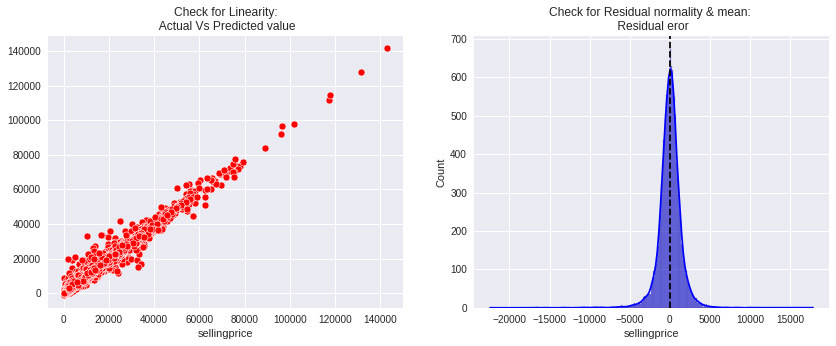

In [ ]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

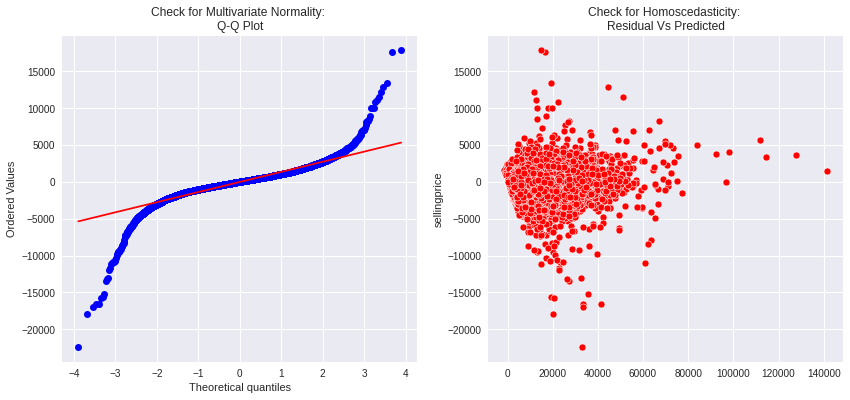

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
X.head()

,year,transmission,condition,odometer,mmr,body_Coupe,body_Hatchback,body_Mini- van,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_FIAT,make_Ferrari,make_Fisker,make_Ford,make_GMC,make_Geo,make_HUMMER,make_Honda,make_Hyundai,make_Infiniti,make_Isuzu,make_Jaguar,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_MINI,make_Maserati,...,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart,state_az,state_ca,state_co,state_fl,state_ga,state_hi,state_il,state_in,state_la,state_ma,state_md,state_mi,state_mn,state_mo,state_ms,state_nc,state_ne,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_pr,state_sc,state_tn,state_tx,state_ut,state_va,state_wa,state_wi
19061,2010,0,1.0,999999.0,2850,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
686,2003,0,2.0,999999.0,700,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40912,2006,0,2.0,999999.0,1800,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13150,2014,0,1.0,999999.0,11300,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
241,1998,0,2.0,999999.0,650,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# calculating VIF, VIF>10  implies high multicolinearity
# variance inflation factor (VIF) identifies correlation between independent variables and strength of that correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_data = pd.DataFrame()
VIF_data['feature'] = X.columns 

VIF_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,feature,VIF
0,year,45114.038024
1,transmission,1.144169
2,condition,22.384634
3,odometer,6.226735
4,mmr,8.228762
...,...,...
87,state_tx,3899.965083
88,state_ut,152.926596
89,state_va,950.974092
90,state_wa,659.961444


In [ ]:
vif_features_drop = VIF_data[VIF_data['VIF'] > 10]
print(vif_features_drop.count())
columns = vif_features_drop["feature"].tolist()
columns


feature    39
VIF        39
dtype: int64


['year',
 'condition',
 'body_SUV',
 'body_Sedan',
 'make_Chevrolet',
 'make_Ford',
 'make_Nissan',
 'state_az',
 'state_ca',
 'state_co',
 'state_fl',
 'state_ga',
 'state_hi',
 'state_il',
 'state_in',
 'state_la',
 'state_ma',
 'state_md',
 'state_mi',
 'state_mn',
 'state_mo',
 'state_ms',
 'state_nc',
 'state_ne',
 'state_nj',
 'state_nm',
 'state_nv',
 'state_ny',
 'state_oh',
 'state_or',
 'state_pa',
 'state_pr',
 'state_sc',
 'state_tn',
 'state_tx',
 'state_ut',
 'state_va',
 'state_wa',
 'state_wi']

In [ ]:
# eliminating multicolinear data for data validation
X_noMulticollinearity=X.drop(columns,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_noMulticollinearity,y,test_size=0.3,random_state=23)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

In [ ]:
print(lin_reg.score(X_test, y_test))
y_pred = lin_reg.predict(X_test)

0.9698929086213456


In [ ]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R2
# R2  is statistical measure of how close data are to the fitted regression line
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(beta) is: ', J_mse_sk)
print('R square obtain for scikit learn library is :', R_square_sk)

The Mean Square Error(MSE) or J(beta) is:  2842115.5733464286
R square obtain for scikit learn library is : 0.9698929086213456


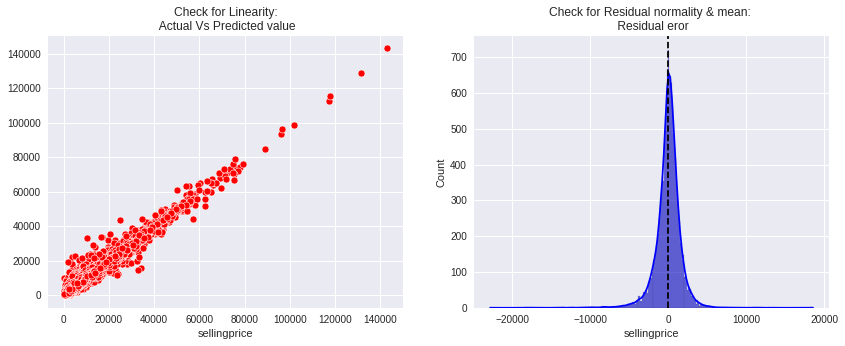

In [ ]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

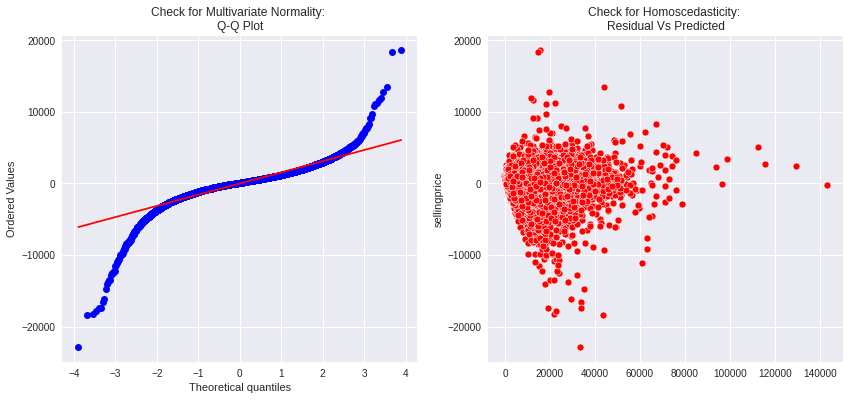

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: In this model, the actual vs predicted plot of selling prices is almost perfectly linear.
The residual mean is zero and the residual error plot is not skewed.
Q-Q plot shows that the model variables are multivariate normal
The plot is homoscedastic, meaning the residuals have constant variance (the data has a funnel or cone shape).
The VIF value had attributes exceeding 10 which are eliminated in second model, so the data does not exhibit high multicollinearity. R^2 indicates that a model explains all the variablity of the response data around the mean. 
Regarding the  recommendation of the model for cars dealership that wants to get reliable estimates for used car prices, we would recommend the model as it has high accuracy and it have high R^2 which means it perform better than the mean. Nevertheless, there is some concerns regarding overfiiting, as the R^2 is too high and almost all dependent variables are explained